In [2]:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from pandas import plotting
pd.set_option('display.max_rows', 200)

filepath = os.path.join('Resources', 'countries.csv')
eco_csv = pd.read_csv(filepath, header=0)


In [3]:
# Data munging
clean_df = pd.DataFrame(eco_csv.iloc[:,[0,1,2,3,4,10,16,17,18]])
clean_df.rename(columns={
    "Total Ecological Footprint": "Eco Footprint per Person", 
    "Total Biocapacity": "Biocapacity per Person",
    "GDP per Capita": "GDP per Capita (USD)",
}, inplace = True)
clean_df.dtypes

# Change GDP per Capita data to float
clean_df['GDP per Capita (USD)'] = clean_df['GDP per Capita (USD)'].replace('[\$,]', '', regex=True).astype(float)

# Drop rows with null values
clean_df.count()   # Some null values in HDI, GDP
clean_df.dropna(how='any', inplace=True)

clean_df.head()

,Country,Region,Population (millions),HDI,GDP per Capita (USD),Eco Footprint per Person,Biocapacity per Person,Biocapacity Deficit or Reserve,Earths Required
0,Afghanistan,Middle East/Central Asia,29.82,0.46,614.66,0.79,0.50,-0.30,0.46
1,Albania,Northern/Eastern Europe,3.16,0.73,4534.37,2.21,1.18,-1.03,1.27
2,Algeria,Africa,38.48,0.73,5430.57,2.12,0.59,-1.53,1.22
3,Angola,Africa,20.82,0.52,4665.91,0.93,2.55,1.61,0.54
4,Antigua and Barbuda,Latin America,0.09,0.78,13205.10,5.38,0.94,-4.44,3.11


## Population v Earths Required

In [4]:
# function to get color for each country's region
def color_attribute(region):
    colors = {
        "Africa": "indianred",                #red
        "Asia-Pacific":"gold",                #yellow
        "European Union":"slateblue",         #purple
        "Latin America":"seagreen",           #green
        "Middle East/Central Asia":"coral",   #orange
        "North America": "steelblue",         #blue
        "Northern/Eastern Europe": "lightseagreen"} #teal
    return colors.get(region, "black")

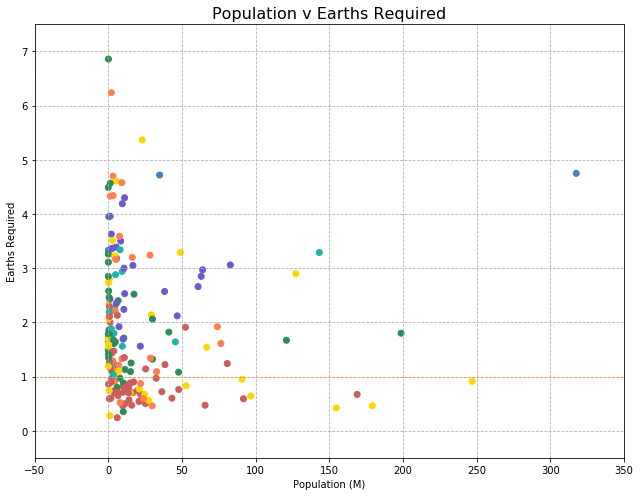


There does not seem to be a definite relationship between Population and Earths Required.
There is mainly a cluster of low population countries distributed randomly along the 
Earths Required axis. However, most countries regardless of population are still 
Earths Required > 1.0.

(Two countries with outlier populations (> 350M), China and India, were not included on 
this graph. Their Earths Required are 1.95 and 0.67, respectively.)



In [5]:
# Data lists
population = eco_csv['Population (millions)']
earths = eco_csv['Earths Required']

# define colors 
color_region = []
countries = len(eco_csv['Region'])
for country in range(countries):
    color_region.append(color_attribute((eco_csv['Region'].tolist())[country]))
    
# Scatter plot
fig, ax = plt.subplots(figsize=(9,7))
plt.scatter(population, earths, color=color_region)
plt.xlim(-50,350,50)
plt.ylim(-0.5,7.5)
plt.title('Population v Earths Required', fontsize=16)
plt.xlabel('Population (M)')
plt.ylabel('Earths Required')
plt.grid(linestyle='--')
plt.axhline(y=1.0, linewidth=0.8, linestyle = '--', color='darkorange', alpha=0.6)

# Save and show the figure
plt.tight_layout()
img_path = os.path.join('Images', '1_population_earths.png')
plt.savefig(img_path)
plt.show()

china_e = float(eco_csv.loc[eco_csv["Country"] == "China"]['Earths Required'])
india_e = float(eco_csv.loc[eco_csv["Country"] == "India"]['Earths Required'])

# Observations
print(f'''
There does not seem to be a definite relationship between Population and Earths Required.
There is mainly a cluster of low population countries distributed randomly along the 
Earths Required axis. However, most countries regardless of population are still 
Earths Required > 1.0.

(Two countries with outlier populations (> 350M), China and India, were not included on 
this graph. Their Earths Required are {china_e} and {india_e}, respectively.)
''')

## HDI v Earths Required

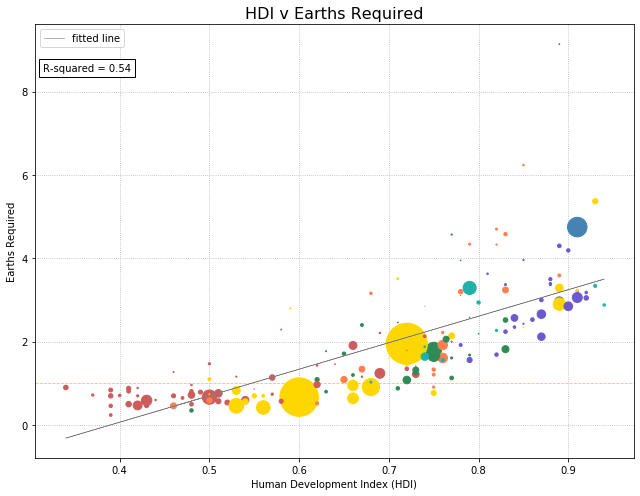

In [6]:
# defining variables
x = clean_df['HDI'].values.tolist()
y = clean_df['Earths Required'].values.tolist()
s = clean_df['Population (millions)'].values.tolist()
s = [dot*1.2 for dot in s]

# define colors
color_region = []
countries = len(clean_df['Region'])
for country in range(countries):
    color_region.append(color_attribute((clean_df['Region'].tolist())[country]))

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (9,7))
ax.scatter(x, y, s, c = color_region, zorder=2)
plt.plot(x, fit, 'black', label='fitted line', linewidth=0.6, color='grey')
plt.legend()
plt.grid(linestyle='dotted', zorder=0)
plt.axhline(y=1.0, linewidth=0.8, linestyle = '--', color='darkorange', alpha=0.6, zorder=0)

plt.xlabel('Human Development Index (HDI)')
plt.ylabel('Earths Required')
plt.title("HDI v Earths Required", fontsize=16)
plt.text(0.315, 8.5, "R-squared = 0.54", bbox=dict(facecolor='white'))

# Save and show the figure
plt.tight_layout()
img_path = os.path.join('Images', '3_hdi_earths_region.png')
plt.savefig(img_path)
plt.show()


In [7]:
# Number of Countries with Earths Required > 1.0
earths = eco_csv.loc[(eco_csv['Earths Required']>1.0),:]
all_earths_reqd = earths['Country'].count()
all_countries = eco_csv['Country'].count()
print(f'{all_earths_reqd} of {all_countries} countries have Earths Required > 1.0')

129 of 188 countries have Earths Required > 1.0


## HDI Groups v Eco Footprint

In [8]:
# Create new HDI group dataframe
hdi_df = pd.DataFrame(clean_df)

# Create bins by HDI group
hdi_bins = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hdi_groups = ["<0.4", "0.41-0.5", "0.51-0.6", "0.61-0.7", "0.71-0.8", "0.81-0.9", ">0.9"]

hdi_df["HDI Groups"] = pd.cut(hdi_df["HDI"], hdi_bins, labels=hdi_groups)

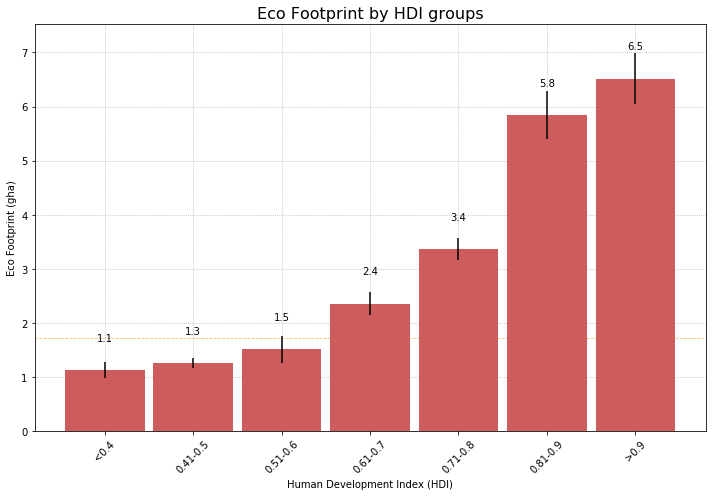

In [9]:
# calculating mean
hdi_earth_reqd = hdi_df.groupby("HDI Groups").mean()['Eco Footprint per Person']
hdi_earth_reqd = pd.DataFrame(hdi_earth_reqd)

# calculating standard error
hdi_earth_sem = hdi_df.groupby("HDI Groups").sem()['Eco Footprint per Person']
hdi_earth_sem = pd.DataFrame(hdi_earth_sem)

# data lists
earths_reqd = hdi_earth_reqd['Eco Footprint per Person'].tolist()
sem = hdi_earth_sem['Eco Footprint per Person'].tolist()

# Bar chart
fig, ax = plt.subplots(figsize = (10,7))
x_axis = np.arange(len(hdi_groups))
ax.set_xticks(x_axis)
ax.set_xticklabels(hdi_groups, rotation = 45)
plt.ylim(0, max(earths_reqd)+1.0)

plt.grid(linestyle='dotted', zorder=0)
plt.axhline(y=1.73, linewidth=0.8, linestyle = '--', color='darkorange', alpha=0.6, zorder=0)

plt.xlabel('Human Development Index (HDI)')
plt.ylabel('Eco Footprint (gha)')
plt.title ('Eco Footprint by HDI groups', fontsize=16)

rects1 = ax.bar(x_axis, earths_reqd, width = 0.9, color = 'indianred', yerr = sem, zorder=2)

# Label bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height + 0.5, round(height,1),
        ha = 'center', va = 'bottom', alpha = 2)
autolabel(rects1)

# Save and show the figure
plt.tight_layout()
img_path = os.path.join('Images', '4a_hdi_earths.png')
plt.savefig(img_path)
plt.show()


## HDI Groups v Bio Reserve / Deficit

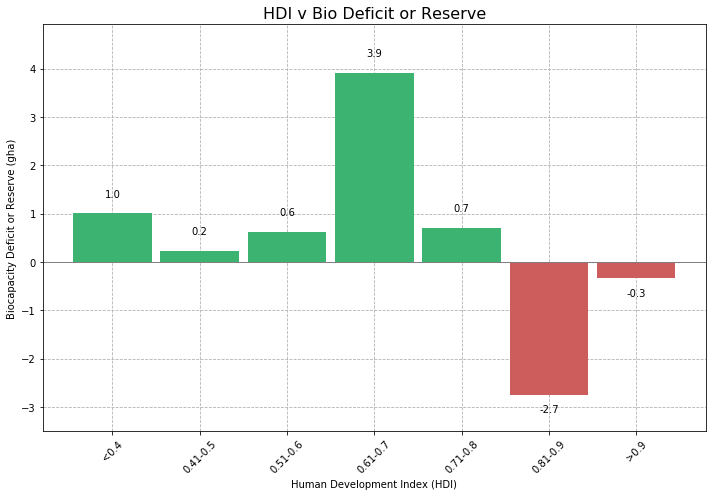

In [10]:
# calculating Biocapacity Deficit or Reserve mean
hdi_deficit= hdi_df.groupby("HDI Groups").mean()['Biocapacity Deficit or Reserve']
hdi_deficit = pd.DataFrame(hdi_deficit)

# data lists
deficit_reserve = hdi_deficit['Biocapacity Deficit or Reserve'].tolist()

# set up axes and formatting
fig, ax = plt.subplots(figsize = (10,7))
x_axis = np.arange(len(hdi_groups))
ax.set_xticks (x_axis)
ax.set_xticklabels (hdi_groups, rotation = 45)
plt.axhline(linewidth=1.0, color='grey')
plt.ylim(-3.5, max(deficit_reserve)+1.0)

plt.xlabel('Human Development Index (HDI)')
plt.ylabel('Biocapacity Deficit or Reserve (gha)')
plt.title('HDI v Bio Deficit or Reserve', fontsize=16)
plt.grid(linestyle= '--', zorder=0)

# selecting colors of bars
bar_color = []
for num in deficit_reserve:
    if num <= 0:
        bar_color.append('indianred')
    else:
        bar_color.append('mediumseagreen')

# bar chart
rects2 = ax.bar(x_axis, deficit_reserve, width = 0.9, color =bar_color, zorder=2)

# getting labels on each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height >= 0:
            label = height + 0.3
        else:
            label = height - 0.4
        ax.text(rect.get_x() + rect.get_width()/2, label, round(height,1),
        ha = 'center', va = 'bottom', alpha = 2)
autolabel(rects2)

# Save and show the figure
plt.tight_layout()
img_path = os.path.join('Images', '4b_hdi_reserve.png')
plt.savefig(img_path)
plt.show()


## GDP v Earths Required

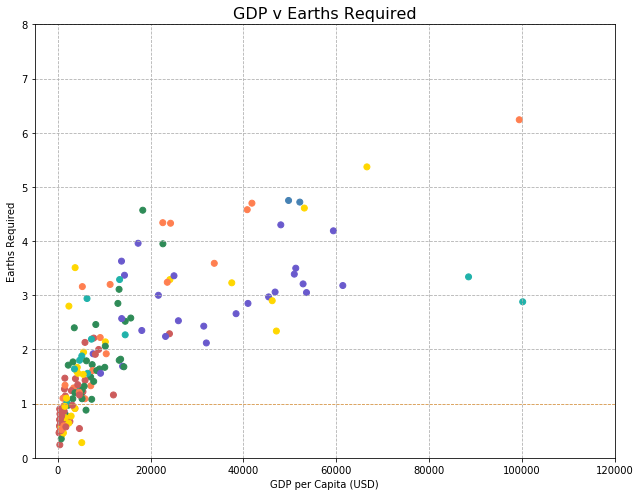

In [11]:
# Data lists
gdp = clean_df['GDP per Capita (USD)']
earths = clean_df['Earths Required']

# define colors 
color_region = []
countries = len(clean_df['Region'])
for country in range(countries):
    color_region.append(color_attribute((clean_df['Region'].tolist())[country]))
    
# Set up axes and labels
fig, ax = plt.subplots(figsize=(9,7))

plt.grid(linestyle='--')
plt.xlim(-5000,120000)
plt.ylim(0,8)
plt.axhline(y=1.0, linewidth=0.8, linestyle = '--', color='darkorange', alpha=0.6)

plt.title('GDP v Earths Required', fontsize=16)
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Earths Required')

# Scatter plot
plt.scatter(gdp, earths, color=color_region)

# Save and show the figure
plt.tight_layout()
img_path = os.path.join('Images', '5_gdp_earths.png')
plt.savefig(img_path)
plt.show()

## GDP v Eco Footprint

In [12]:
# Create new GDP group dataframe
gdp_df = pd.DataFrame(clean_df)

# Create GDP bins
# gdp_bins =[0, 1000, 5000, 15000, 40000, 60000, 100000]
# gdp_labels = ["< $1000", "< $5000", "< $15000", "< $40000", "< $60000", "< $100000"]
gdp_bins =[0, 20000, 40000, 60000, 80000, 100000, 120000]
gdp_labels = ["< \$20K", "\$20K-\$40K", "\$40K-\$60K", "\$60K-\$80K", "\$80K-\$100K", "\$100K-\$120K"]

gdp_df["GDP Categories"] = pd.cut(gdp_df["GDP per Capita (USD)"], gdp_bins, labels=gdp_labels)

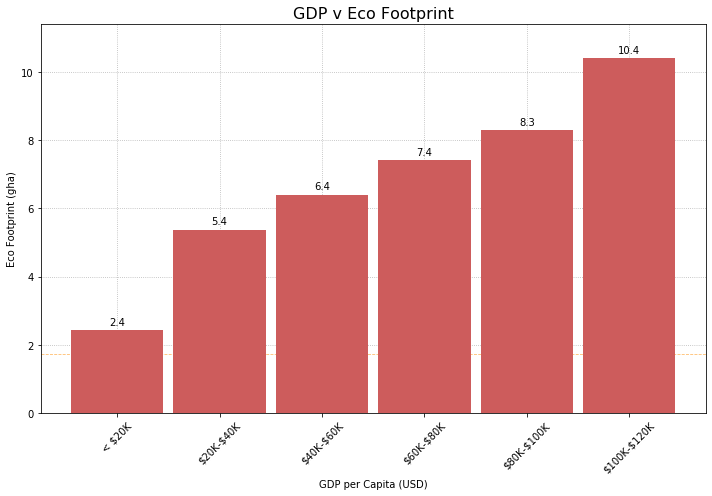

In [13]:
# calculating mean
gdp_earths = gdp_df.groupby("GDP Categories").mean()

# Bar chart
fig, ax = plt.subplots(figsize=(10,7))
y_values = gdp_earths["Eco Footprint per Person"].tolist()
x_ticks = np.arange(len(gdp_labels))
ax.set_xticks(x_ticks)
ax.set_xticklabels(gdp_labels, rotation=45)
plt.ylim(0, max(y_values)+1.0)

rects1 = plt.bar(gdp_labels, y_values, width=0.9, color='indianred', zorder=2)

# Set the labels
plt.title("GDP v Eco Footprint", fontsize=16)
plt.xlabel("GDP per Capita (USD)")
plt.ylabel("Eco Footprint (gha)")
plt.grid(linestyle='dotted', zorder=0)
plt.axhline(y=1.73, linewidth=0.8, linestyle = '--', color='darkorange', alpha=0.6, zorder=0)

# Label bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height + 0.1, round(height,1),
        ha = 'center', va = 'bottom', alpha = 2)
autolabel(rects1)

# Save and show the figure
plt.tight_layout()
img_path = os.path.join('Images', '6a_gdp_earths.png')
plt.savefig(img_path)
plt.show()

## GDP v Bio Reserve / Deficit

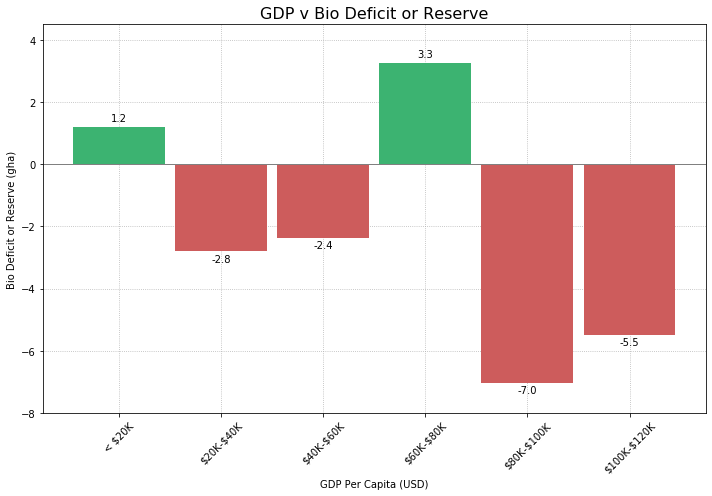

In [14]:
# calculating Biocapacity Deficit or Reserve mean
gdp_deficit = clean_df.groupby("GDP Categories").mean()

# data list
y_values = gdp_deficit["Biocapacity Deficit or Reserve"].tolist()

# set up axes and formatting
fig, ax = plt.subplots(figsize=(10,7))
x_ticks = np.arange(len(gdp_labels))
ax.set_xticks(x_ticks)
ax.set_xticklabels(gdp_labels, rotation=45)
plt.ylim(-8, 4.5)

plt.axhline(linewidth=1.0, color='grey')
plt.grid(linestyle='dotted', zorder=0)

plt.title("GDP v Bio Deficit or Reserve", fontsize=16)
plt.xlabel("GDP Per Capita (USD)")
plt.ylabel("Bio Deficit or Reserve (gha)")

# Color the bars        
bar_color = []
for change in y_values:
    if change <= 0:
        bar_color.append('indianred')
    else:
        bar_color.append('mediumseagreen')

rects3 = ax.bar(x_ticks, y_values, width=0.9, color=bar_color, zorder=2)

# getting labels on each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height >= 0:
            label = height + 0.1
        else:
            label = height - 0.4
        ax.text(rect.get_x() + rect.get_width()/2, label, round(height,1),
        ha = 'center', va = 'bottom', alpha = 2)
autolabel(rects3)

# Save and show the figure
plt.tight_layout()
img_path = os.path.join('Images', '6b_gdp_reserve.png')
plt.savefig(img_path)
plt.show()

## Development of Countries (HDI v GDP v Earths Required)

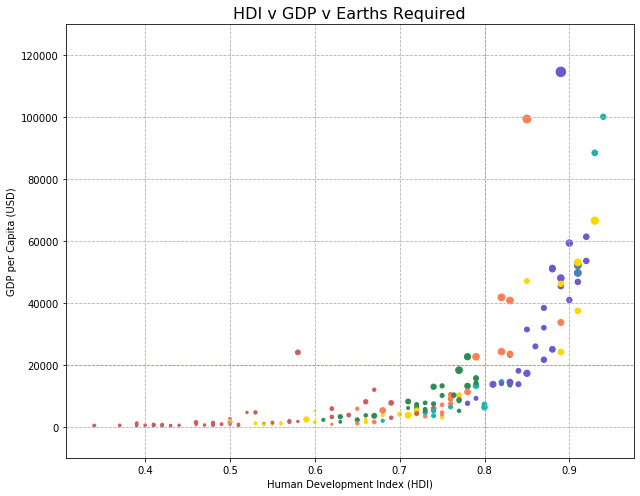


Both Human Development Index (HDI) and Gross Domestic Product (GDP), in part, 
define the overall development of a country. 

Developed countries are those with HDI >= 0.8. The range(s) for developing and 
lesser-developed countries are not fully agreed upon by economists but max GDP is
generally estimated around $20,000. 

As you can see, these ranges fit on our scatter plot, weighted by Earths Required. 
Earths Required gradually become greater as HDI increases.



In [15]:
# Calculate Footprint per Million Persons
earths = clean_df['Earths Required']

# Data lists
hdi = clean_df['HDI'].tolist()
gdp = clean_df['GDP per Capita (USD)'].tolist()
earths = [dot*10 for dot in earths]

# define colors 
color_region = []
countries = len(clean_df['Region'])
for country in range(countries):
    color_region.append(color_attribute((clean_df['Region'].tolist())[country]))

# Set up axes and labels
fig, ax = plt.subplots(figsize=(9,7))
plt.grid(linestyle='--')
plt.ylim(-10000,130000)

gdp_min = plt.axhline(y=20000, linewidth=0.8, linestyle = '--', color='darkorange')
hdi_max = plt.axvline(x=0.80, linewidth=0.8, linestyle = '--', color='darkorange')

plt.xlabel('Human Development Index (HDI)')
plt.ylabel('GDP per Capita (USD)')
plt.title('HDI v GDP v Earths Required', fontsize=16)

# Plot the chart
plt.scatter(hdi, gdp, s=earths, color=color_region)

# Save and show the figure
plt.tight_layout()
img_path = os.path.join('Images', '2_hdi_gdp_earths.png')
plt.savefig(img_path)
plt.show()

# Observations
print('''
Both Human Development Index (HDI) and Gross Domestic Product (GDP), in part, 
define the overall development of a country. 

Developed countries are those with HDI >= 0.8. The range(s) for developing and 
lesser-developed countries are not fully agreed upon by economists but max GDP is
generally estimated around $20,000. 

As you can see, these ranges fit on our scatter plot, weighted by Earths Required. 
Earths Required gradually become greater as HDI increases.
''')

## Countries Ranked by Earths Required

In [16]:
# Countries ranked by Eco Footprint
footprint_df = pd.DataFrame(eco_csv.iloc[:,[0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18]])
footprint_df = footprint_df.sort_values('Earths Required')
footprint_df.reset_index(inplace=True, drop=True)
footprint_df

,Country,Region,Population (millions),HDI,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required
0,Eritrea,Africa,6.130,0.390000,0.10,0.18,0.06,0.03,0.01,0.42,0.07,0.18,0.09,0.93,0.02,1.30,0.88,0.24
1,Timor-Leste,Asia-Pacific,1.110,0.600000,0.25,0.07,0.04,0.06,0.02,0.48,0.21,0.06,0.52,0.94,0.04,1.78,1.30,0.28
2,Haiti,Latin America,10.170,0.480000,0.27,0.04,0.10,0.15,0.01,0.61,0.18,0.03,0.01,0.01,0.03,0.27,-0.34,0.35
3,Bangladesh,Asia-Pacific,154.700,0.560000,0.29,0.00,0.08,0.26,0.02,0.72,0.25,0.00,0.00,0.05,0.07,0.38,-0.35,0.42
4,Afghanistan,Middle East/Central Asia,29.820,0.460000,0.30,0.20,0.08,0.18,0.00,0.79,0.24,0.20,0.02,0.00,0.04,0.50,-0.30,0.46
5,Burundi,Africa,9.850,0.390000,0.21,0.07,0.45,0.04,0.00,0.80,0.20,0.07,0.01,0.01,0.03,0.32,-0.48,0.46
6,Pakistan,Asia-Pacific,179.160,0.530000,0.27,0.01,0.08,0.38,0.02,0.79,0.26,0.00,0.01,0.04,0.03,0.35,-0.44,0.46
7,"Congo, Democratic Republic of",Africa,65.700,0.420000,0.15,0.01,0.51,0.07,0.01,0.82,0.13,0.32,2.52,0.05,0.05,3.07,2.25,0.47
8,Malawi,Africa,15.910,0.430000,0.43,0.05,0.20,0.07,0.01,0.81,0.45,0.07,0.02,0.06,0.05,0.66,-0.15,0.47
9,Mozambique,Africa,25.200,0.410000,0.31,0.03,0.29,0.17,0.03,0.87,0.28,0.96,0.61,0.17,0.05,2.06,1.19,0.50


In [17]:
index_us = footprint_df.loc[footprint_df["Country"] == "United States of America"].index[0]
index_us += 1
index_us
print(f'The U.S. ranks {index_us} out of 188 countries in Earths Required.')

The U.S. ranks 184 out of 188 countries in Earths Required.


## Eco Footprint Composition for Each HDI Group

In [18]:
# Create new dataframe with parts of Eco Footprint
composition_df = pd.DataFrame(footprint_df)
composition_df["HDI Groups"] = pd.cut(composition_df["HDI"], hdi_bins, labels=hdi_groups)
composition_df = composition_df.groupby('HDI Groups').mean()

# New dataframe with Bio Deficits or Reserves only
landuse = pd.DataFrame({
    'Eco Footprint per Person' : composition_df['Total Ecological Footprint'],
    'Biocapacity per Person' : composition_df['Total Biocapacity'],
    'Total Bio Deficit or Reserve' : composition_df['Biocapacity Deficit or Reserve'],
    'Carbon Deficit or Reserve' : composition_df['Urban Land'] - composition_df['Carbon Footprint'],
    'Cropland Deficit or Reserve' : composition_df['Cropland'] - composition_df['Cropland Footprint'],
    'Forest Deficit or Reserve' : composition_df['Forest Land'] - composition_df['Forest Footprint'],
    'Grazing Deficit or Reserve' : composition_df['Grazing Land'] - composition_df['Grazing Footprint'],
    'Fish Deficit or Reserve' : composition_df['Fishing Water'] - composition_df['Fish Footprint'],
    'Earths Required' : composition_df['Earths Required'],
}) 
# round all float numbers to nearest tenth
landuse = landuse.round(2)

# Observations
print(f'''
Total Eco Footprint and Carbon Deficit are rather high around HDI groups 0.7 and 0.8 where 
countries are reaching a "developed" stage. All groups have a Carbon Deficit which shows 
that Urban Land is where most ecological assets are being consumed rather than produced.
''')

# Conditional color formatting
def highlight_pos(value):
    is_pos = value >= 0
    return ['background-color: lightseagreen' if v else 'background-color: lightcoral' for v in is_pos]

df_slice = pd.IndexSlice[:, 'Total Bio Deficit or Reserve':'Fish Deficit or Reserve']
landuse.style.apply(highlight_pos, subset = df_slice)



Total Eco Footprint and Carbon Deficit are rather high around HDI groups 0.7 and 0.8 where 
countries are reaching a "developed" stage. All groups have a Carbon Deficit which shows 
that Urban Land is where most ecological assets are being consumed rather than produced.



,Eco Footprint per Person,Biocapacity per Person,Total Bio Deficit or Reserve,Carbon Deficit or Reserve,Cropland Deficit or Reserve,Forest Deficit or Reserve,Grazing Deficit or Reserve,Fish Deficit or Reserve,Earths Required
HDI Groups,,,,,,,,,
<0.4,1.13,2.14,1.01,-0.03,-0.01,0.85,0.1,0.14,0.65
0.41-0.5,1.26,1.5,0.23,-0.18,-0.05,0.23,0.17,0.18,0.73
0.51-0.6,1.52,2.15,0.63,-0.39,-0.04,0.69,0.35,0.13,0.88
0.61-0.7,2.32,6.04,3.72,-1.02,-0.03,4.02,0.5,0.54,1.34
0.71-0.8,3.37,4.07,0.7,-1.91,-0.12,2.36,0.16,0.46,1.94
0.81-0.9,5.85,3.1,-2.75,-3.79,-0.09,0.5,-0.1,0.27,3.38
>0.9,6.52,6.18,-0.34,-3.97,0.43,1.38,0.64,0.96,3.76


## HDI v Eco Footprint Composition

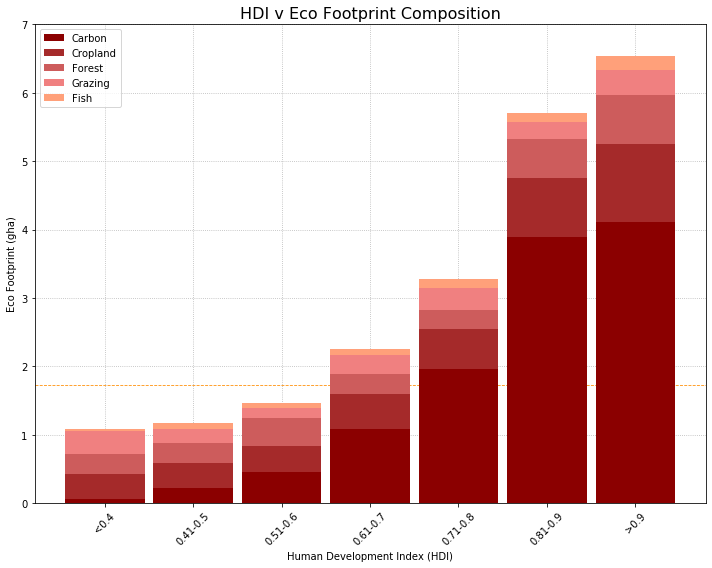


Most groups have a large Carbon Footprint. Carbon Footprint primarily comes from Urban Land. 
Urban Land consumes a lot resources and produces a lot of waste while other Land Types 
produce a lot of resources while producing little waste, even absorbing some waste.



In [19]:
# Data lists
dev_footprint = composition_df.groupby('HDI Groups').sum()

carbon_foot = dev_footprint['Carbon Footprint']
crop_foot = dev_footprint['Cropland Footprint']
forest_foot = dev_footprint['Forest Footprint']
grazing_foot = dev_footprint['Grazing Footprint']
fish_foot = dev_footprint['Fish Footprint']

# Set up axes and labels
fig, ax = plt.subplots(figsize=(10,8))
x_ticks = np.arange(len(hdi_groups))
ax.set_xticks(x_ticks)
ax.set_xticklabels(hdi_groups, rotation=45)
plt.ylim(0, 7)
plt.grid(linestyle='dotted', zorder=0)
plt.axhline(y=1.73, linewidth=0.8, linestyle = '--', color='darkorange', zorder=0)

plt.title('HDI v Eco Footprint Composition', fontsize=16)
plt.xlabel('Human Development Index (HDI)')
plt.ylabel('Eco Footprint (gha)')

# Calculate the bottoms of each stacked bar
crop_bottom = carbon_foot
forest_bottom = np.add(carbon_foot, crop_foot)
grazing_bottom = np.add(forest_bottom, forest_foot)
fish_bottom = np.add(grazing_bottom, grazing_foot)

# Plot the stacked bar chart
carbon_bar = plt.bar(x_ticks, carbon_foot, width=0.9, color='darkred', zorder=2)
crop_bar = plt.bar(x_ticks, crop_foot, width=0.9, bottom=crop_bottom, color='brown', zorder=2)
forest_bar = plt.bar(x_ticks, forest_foot, width=0.9, bottom=forest_bottom, color='indianred', zorder=2)
grazing_bar = plt.bar(x_ticks, grazing_foot, width=0.9, bottom=grazing_bottom, color='lightcoral', zorder=2)
fish_bar = plt.bar(x_ticks, fish_foot, width=0.9, bottom=fish_bottom, color='lightsalmon', zorder=2)

plt.legend((carbon_bar, crop_bar, forest_bar, grazing_bar, fish_bar), ('Carbon', 'Cropland', 'Forest', 'Grazing', 'Fish'))

# Save and show the figure
plt.tight_layout()
plt.savefig('Images/7_hdi_footprint.png')
plt.show()

# Observations
print('''
Most groups have a large Carbon Footprint. Carbon Footprint primarily comes from Urban Land. 
Urban Land consumes a lot resources and produces a lot of waste while other Land Types 
produce a lot of resources while producing little waste, even absorbing some waste.
''')

# Hypothesis Testing

### Hypothesis:
If developed countries create a higher ecological footprint,
then when HDI is 0.7 or higher, the ecological footprint would increase.

### Null:
If level of development in a country has no effect on ecological footprint,
then the ecological footprint would be random across countries.

In [20]:
HDI_4_f = clean_df.loc[(hdi_df['HDI Groups']=='0.41-0.5')]['Eco Footprint per Person']
HDI_5_f = clean_df.loc[(hdi_df['HDI Groups']=='0.51-0.6')]['Eco Footprint per Person']
HDI_6_f = clean_df.loc[(hdi_df['HDI Groups']=='0.61-0.7')]['Eco Footprint per Person']
HDI_7_f = clean_df.loc[(hdi_df['HDI Groups']=='0.71-0.8')]['Eco Footprint per Person']
HDI_8_f = clean_df.loc[(hdi_df['HDI Groups']=='0.81-0.9')]['Eco Footprint per Person']
HDI_9_f = clean_df.loc[(hdi_df['HDI Groups']=='>0.9')]['Eco Footprint per Person']

In [21]:
stats.f_oneway(HDI_4_f, HDI_5_f, HDI_6_f, HDI_7_f, HDI_8_f, HDI_9_f)

F_onewayResult(statistic=42.60525397593801, pvalue=1.2261277465603533e-27)

### There was significant difference in the Total Eco Footprints among HDI groups (p-value 1.23e-27). This means the development of countries does have an impact on footprint.

In [22]:
stats.ttest_ind(HDI_4_f, HDI_5_f, equal_var=False)

Ttest_indResult(statistic=-0.9548883492591093, pvalue=0.34986296790085536)

In [23]:
stats.ttest_ind(HDI_5_f, HDI_6_f, equal_var=False)

Ttest_indResult(statistic=-2.554444679851258, pvalue=0.01478565711280146)

In [24]:
stats.ttest_ind(HDI_6_f, HDI_7_f, equal_var=False)

Ttest_indResult(statistic=-3.404189063556008, pvalue=0.0011685029187518043)

In [25]:
stats.ttest_ind(HDI_7_f, HDI_8_f, equal_var=False)

Ttest_indResult(statistic=-5.124109903860091, pvalue=6.08124799403839e-06)

In [26]:
stats.ttest_ind(HDI_8_f, HDI_9_f, equal_var=False)

Ttest_indResult(statistic=-1.049604661061214, pvalue=0.3028422464868786)

In [27]:
stats.ttest_ind(HDI_9_f, HDI_4_f, equal_var=False)

Ttest_indResult(statistic=11.01746012239995, pvalue=3.602064655526476e-07)

### The Independent T-Tests between HDI groups shows there was significant difference in the Total Eco Footprint in the range of HDI > 0.5 to HDI <= 0.8. These are the countries that are "developing".

In [28]:
HDI_4_b = clean_df.loc[(clean_df['HDI Groups']=='0.41-0.5')]['Biocapacity per Person'] 
HDI_5_b = clean_df.loc[(clean_df['HDI Groups']=='0.51-0.6')]['Biocapacity per Person']                                                                                                                                        
HDI_6_b = clean_df.loc[(clean_df['HDI Groups']=='0.61-0.7')]['Biocapacity per Person']
HDI_7_b = clean_df.loc[(clean_df['HDI Groups']=='0.71-0.8')]['Biocapacity per Person']
HDI_8_b = clean_df.loc[(clean_df['HDI Groups']=='0.81-0.9')]['Biocapacity per Person']
HDI_9_b = clean_df.loc[(clean_df['HDI Groups']=='>0.9')]['Biocapacity per Person']

In [29]:
stats.f_oneway(HDI_4_b, HDI_5_b, HDI_6_b, HDI_7_b, HDI_8_b, HDI_9_b)

F_onewayResult(statistic=0.9853859207260757, pvalue=0.4285239806681095)

### There was no significant difference in the Total Biocapacities among HDI-groups (p-value 0.43). 

In [30]:
HDI_4_bdr = clean_df.loc[(clean_df['HDI Groups']=='0.41-0.5')]['Biocapacity Deficit or Reserve']
HDI_5_bdr = clean_df.loc[(clean_df['HDI Groups'] =='0.51-0.6')]['Biocapacity Deficit or Reserve']
HDI_6_bdr = clean_df.loc[(clean_df['HDI Groups']=='0.61-0.7')]['Biocapacity Deficit or Reserve']
HDI_7_bdr = clean_df.loc[(clean_df['HDI Groups']=='0.71-0.8')]['Biocapacity Deficit or Reserve']
HDI_8_bdr = clean_df.loc[(clean_df['HDI Groups']=='0.81-0.9')]['Biocapacity Deficit or Reserve']
HDI_9_bdr = clean_df.loc[(clean_df['HDI Groups'] =='>0.9')]['Biocapacity Deficit or Reserve']

In [31]:
stats.f_oneway(HDI_4_bdr, HDI_5_bdr, HDI_6_bdr, HDI_7_bdr, HDI_8_bdr, HDI_9_bdr)

F_onewayResult(statistic=1.5045334876008147, pvalue=0.1913414959266887)

### There was no significant difference in the Biocapacity Deficits/Reserves among HDI-groups (p-value 0.19). It is likely due to the unrelated Total Biocapacities. 